In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

## Load Data

In [44]:
root_dir = './'
local_path_biome = '/bd_mir_bioma_without_xy.csv'
file_path_biome = root_dir + local_path_biome

df_biome = pd.read_csv(file_path_biome)

In [45]:
df_biome.shape[0]

720

In [46]:
df_biome_amazon = df_biome.where(df_biome['Bioma'] =='Amazon Rainforest').dropna(axis = 0)
df_biome_atlantic= df_biome.where(df_biome['Bioma'] == 'Atlantic Forest').dropna(axis = 0)
df_biome_caatinga = df_biome.where(df_biome['Bioma'] == 'Caatinga').dropna(axis = 0)
df_biome_cerrado = df_biome.where(df_biome['Bioma'] == 'Cerrado').dropna(axis = 0)

In [47]:
df_biome_amazon_data = df_biome_amazon.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_amazon_target = pd.DataFrame(df_biome_amazon, columns=['Carbon_gkg'])

df_biome_atlantic_data = df_biome_atlantic.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_atlantic_target = pd.DataFrame(df_biome_atlantic, columns=['Carbon_gkg'])

df_biome_caatinga_data = df_biome_caatinga.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_caatinga_target = pd.DataFrame(df_biome_caatinga, columns=['Carbon_gkg'])

df_biome_cerrado_data = df_biome_cerrado.drop(['ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_cerrado_target = pd.DataFrame(df_biome_cerrado, columns=['Carbon_gkg'])

In [48]:
df_biome_test = pd.read_csv('./bd_mir_biome_test_without_xy.csv')

In [49]:
df_biome_test_data = df_biome_test.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_target = pd.DataFrame(df_biome_test, columns=['Carbon_gkg'])

In [50]:
df_biome_test_amazon = df_biome_test.where(df_biome_test['Bioma'] =='Amazon Rainforest').dropna(axis = 0)
df_biome_test_amazon_data = df_biome_test_amazon.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_amazon_data = df_biome_test_amazon_data.apply(lambda x:np.log(1/x))
df_biome_test_amazon_target = pd.DataFrame(df_biome_test_amazon, columns=['Carbon_gkg'])

In [51]:
df_biome_test_atlantic= df_biome_test.where(df_biome_test['Bioma'] == 'Atlantic Forest').dropna(axis = 0)
df_biome_test_atlantic_data = df_biome_test_atlantic.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_atlantic_data = df_biome_test_atlantic_data.apply(lambda x:np.log(1/x))
df_biome_test_atlantic_target = pd.DataFrame(df_biome_test_atlantic, columns=['Carbon_gkg'])

In [52]:
df_biome_test_caatinga = df_biome_test.where(df_biome_test['Bioma'] == 'Caatinga').dropna(axis = 0)
df_biome_test_caatinga_data = df_biome_test_caatinga.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_caatinga_data = df_biome_test_caatinga_data.apply(lambda x:np.log(1/x))
df_biome_test_caatinga_target = pd.DataFrame(df_biome_test_caatinga, columns=['Carbon_gkg'])

In [53]:
df_biome_test_cerrado = df_biome_test.where(df_biome_test['Bioma'] == 'Cerrado').dropna(axis = 0)
df_biome_test_cerrado_data = df_biome_test_cerrado.drop(['ID','ID_Unico','Bioma','Carbon_gkg'], axis=1)
df_biome_test_cerrado_data = df_biome_test_cerrado_data.apply(lambda x:np.log(1/x))
df_biome_test_cerrado_target = pd.DataFrame(df_biome_test_cerrado, columns=['Carbon_gkg'])

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_test_amazon_data)
df_biome_test_amazon_data_tr = pd.DataFrame(X,columns=df_biome_test_amazon_data.columns)

In [55]:
X = pipeline.fit_transform(df_biome_test_caatinga_data)
df_biome_test_caatinga_data_tr = pd.DataFrame(X,columns=df_biome_test_caatinga_data.columns)

In [56]:
X = pipeline.fit_transform(df_biome_test_atlantic_data)
df_biome_test_atlantic_data_tr = pd.DataFrame(X,columns=df_biome_test_atlantic_data.columns)

In [57]:
X = pipeline.fit_transform(df_biome_test_cerrado_data)
df_biome_test_cerrado_data_tr = pd.DataFrame(X,columns=df_biome_test_cerrado_data.columns)

## Preprocess

In [58]:
df_biome_amazon

,ID_Unico,Bioma,Carbon_gkg,4000,3995,3990,3985,3980,3975,3970,...,645,640,635,630,625,620,615,610,605,600
0,47334.0,Amazon Rainforest,19.674246,0.077074,0.076753,0.076330,0.075732,0.075193,0.074737,0.074253,...,0.002092,0.001976,0.002311,0.002436,0.001832,0.002312,0.002543,0.003052,0.003337,0.003882
1,47262.0,Amazon Rainforest,20.252900,0.076412,0.076009,0.075634,0.075148,0.074725,0.074331,0.073796,...,0.002044,0.001640,0.001900,0.002240,0.002273,0.002661,0.002736,0.002190,0.002609,0.003427
2,47355.0,Amazon Rainforest,35.297912,0.074155,0.073933,0.073570,0.072974,0.072537,0.072082,0.071611,...,0.002417,0.002007,0.002053,0.002061,0.002022,0.002449,0.002364,0.002387,0.002924,0.003534
3,32613.0,Amazon Rainforest,1.700000,0.100635,0.100200,0.099768,0.100440,0.100036,0.099450,0.099204,...,0.008065,0.007592,0.007852,0.007304,0.007934,0.007512,0.007624,0.007010,0.006702,0.006797
4,47259.0,Amazon Rainforest,21.988863,0.071408,0.071106,0.070715,0.070161,0.069682,0.069334,0.068958,...,0.001694,0.001890,0.001845,0.001862,0.001617,0.001496,0.001929,0.002157,0.002047,0.002599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,47324.0,Amazon Rainforest,20.831555,0.071000,0.070663,0.070360,0.069857,0.069336,0.068857,0.068393,...,0.002242,0.002089,0.001994,0.002065,0.002037,0.002495,0.002372,0.002283,0.002681,0.002687
176,47345.0,Amazon Rainforest,20.252900,0.075071,0.074761,0.074330,0.073690,0.073000,0.072420,0.072071,...,0.001678,0.001716,0.001537,0.001781,0.002493,0.002174,0.001706,0.001886,0.001890,0.002543
177,2870.0,Amazon Rainforest,18.383721,0.090510,0.090978,0.090254,0.090823,0.090580,0.090366,0.090334,...,0.005425,0.005032,0.004446,0.005430,0.004974,0.005312,0.004838,0.004070,0.003912,0.005363
178,47264.0,Amazon Rainforest,22.567517,0.073581,0.073182,0.072806,0.072416,0.071948,0.071416,0.070934,...,0.001950,0.001835,0.001934,0.001933,0.002244,0.001962,0.001956,0.002560,0.002431,0.002380


In [59]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

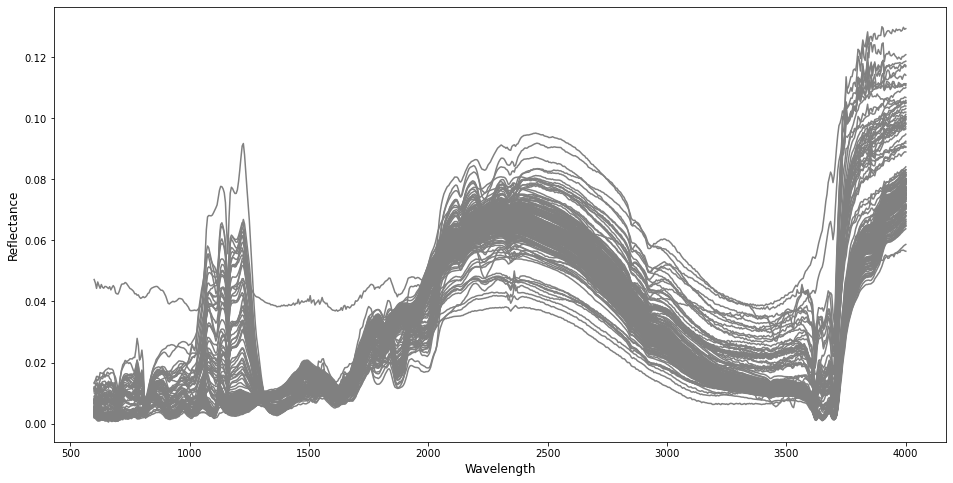

In [60]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_amazon_data)):
    
    test_row = df_biome_amazon_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [61]:
index_ex = df_biome_amazon_data['600'].idxmax()
df_biome_amazon_data = df_biome_amazon_data.drop(index=index_ex)
df_biome_amazon_target = df_biome_amazon_target.drop(index=index_ex)

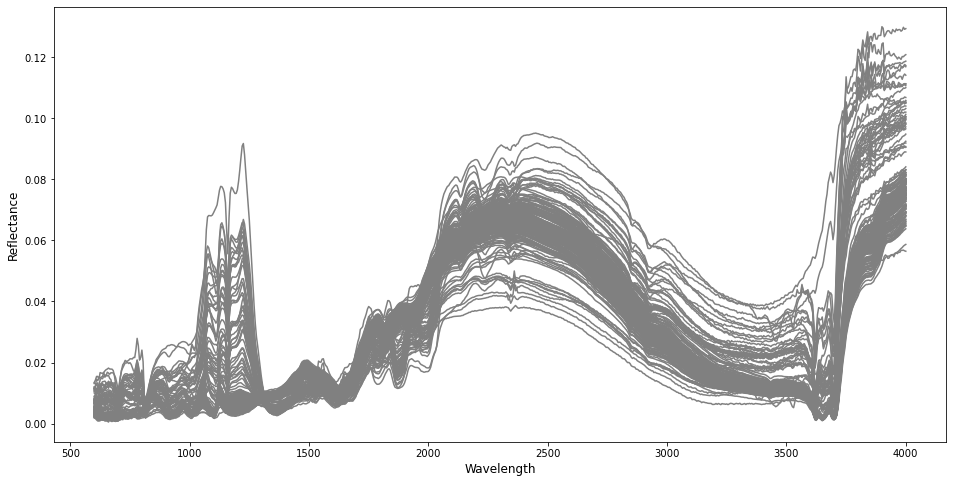

In [62]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_amazon_data)):
    
    test_row = df_biome_amazon_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [64]:
#Converting data from reflectance values to absorbance values
from math import log, exp

df_biome_amazon_data = df_biome_amazon_data.apply(lambda x:np.log(1/x))

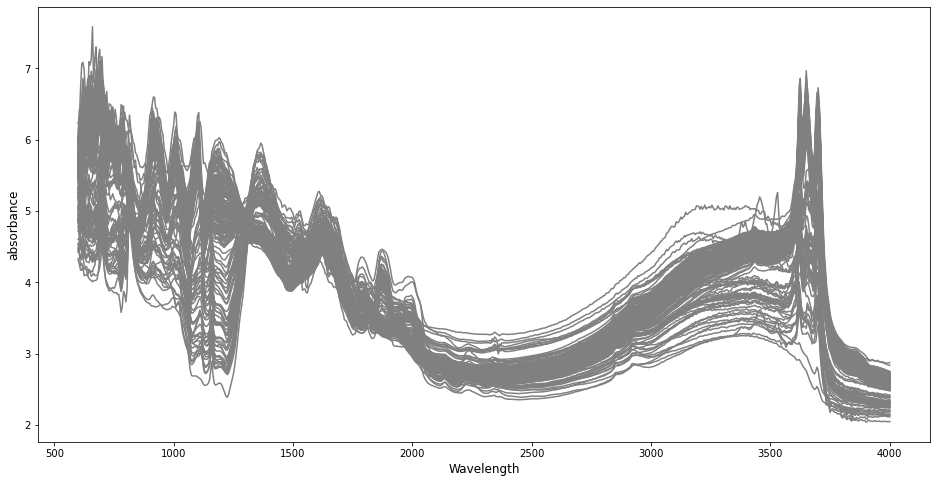

In [65]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_amazon_data)):
    
    test_row = df_biome_amazon_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('absorbance', fontsize=12)
plt.show()

In [22]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

v = scipy.signal.savgol_filter(df_biome_amazon_data,21,3)
for i in range(len(df_biome_amazon_data)):
    for j in range(len(df_biome_amazon_data.iloc[i])):
        df_biome_amazon_data.iloc[i][j] = v[i][j]

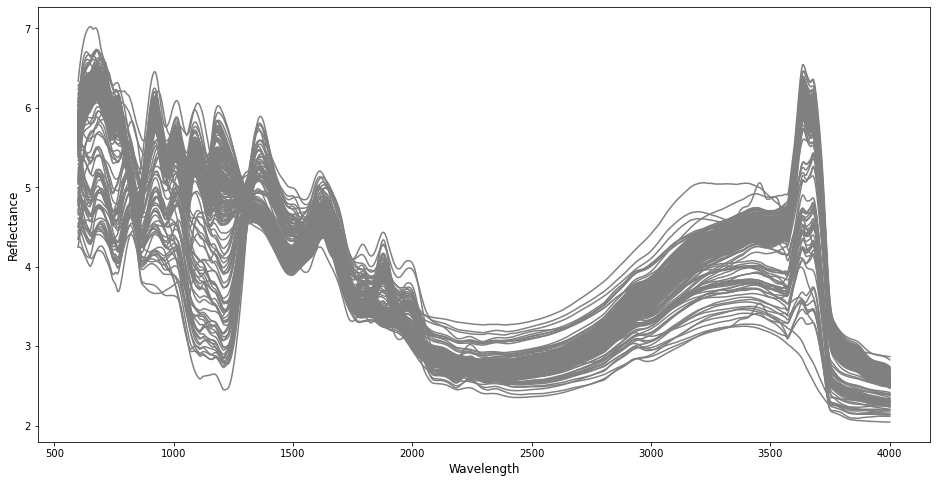

In [23]:
plt.figure(figsize = (16, 8))
for i in range(len(df_biome_amazon_data)):
    
    test_row = df_biome_amazon_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [24]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_biome_amazon_data)
df_biome_amazon_data_tr = pd.DataFrame(X,columns=df_biome_amazon_data.columns)
df_biome_amazon_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,0.227053,0.236588,0.243845,0.249272,0.253222,0.255991,0.257827,0.258955,0.259581,0.259898,...,0.495765,0.478052,0.455858,0.429113,0.397437,0.359978,0.315170,0.260487,0.192479,0.108138
1,0.293778,0.294594,0.295111,0.295417,0.295575,0.295631,0.295620,0.295574,0.295519,0.295479,...,0.549961,0.520692,0.495270,0.474793,0.460569,0.454157,0.457340,0.471819,0.498143,0.533063
2,0.488040,0.485201,0.482634,0.480324,0.478241,0.476349,0.474610,0.472987,0.471443,0.469944,...,0.516493,0.499163,0.482292,0.466953,0.454300,0.445559,0.441951,0.444376,0.452526,0.463020
3,-1.508848,-1.524687,-1.535551,-1.542412,-1.546008,-1.546914,-1.545603,-1.542485,-1.537930,-1.532296,...,-1.664564,-1.650781,-1.635020,-1.617387,-1.597609,-1.574532,-1.545144,-1.502730,-1.433873,-1.315793
4,0.744479,0.739122,0.734120,0.729452,0.725077,0.720944,0.717002,0.713202,0.709496,0.705846,...,0.751618,0.762536,0.779839,0.804364,0.837232,0.879737,0.932925,0.996392,1.065311,1.124858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.778622,0.774295,0.770712,0.767810,0.765510,0.763729,0.762384,0.761391,0.760667,0.760133,...,0.410685,0.402868,0.401583,0.409768,0.431023,0.469879,0.532002,0.623901,0.750843,0.910358
175,0.394542,0.410374,0.422658,0.432061,0.439106,0.444214,0.447741,0.449996,0.451257,0.451787,...,0.694187,0.682291,0.680604,0.692435,0.721912,0.774250,0.855848,0.973618,1.131839,1.323408
176,-0.822815,-0.858240,-0.886685,-0.909530,-0.927862,-0.942560,-0.954360,-0.963899,-0.971749,-0.978437,...,-1.050054,-1.006573,-0.956588,-0.901257,-0.841411,-0.777386,-0.708746,-0.633881,-0.549623,-0.451763
177,0.541331,0.541756,0.541784,0.541524,0.541041,0.540378,0.539560,0.538606,0.537528,0.536338,...,0.659065,0.625416,0.597257,0.579414,0.577559,0.598650,0.651393,0.746225,0.893227,1.094346


## Model 1

In [25]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [26]:
forest_reg_amazon_setup = RandomForestRegressor()
param_grid = {'n_estimators': [100,500,1000,2000]}
gsearch = GridSearchCV(forest_reg_amazon_setup, param_grid)
forest_reg_amazon = gsearch.fit(df_biome_amazon_data_tr, df_biome_amazon_target)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [27]:
Y_predict_amazon_forest = forest_reg_amazon.predict(df_biome_test_amazon_data_tr)
m = mean_squared_error(df_biome_test_amazon_target, Y_predict_amazon_forest)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_amazon_target, Y_predict_amazon_forest)))

root_mean_squared_error: 2.903420881545758
R2: 0.8759760217891261


In [34]:
joblib.dump(forest_reg_amazon, './model/amazon/forest_reg_amazon.pkl')

['./model/amazon/forest_reg_amazon.pkl']

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

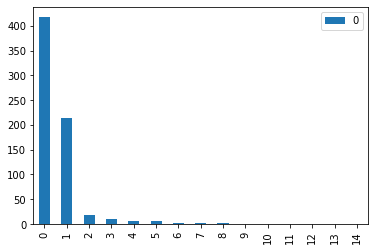

In [37]:
#PCA
df_biome_amazon_data_tr_ = df_biome_amazon_data_tr
ew_amazon, ev_amazon = np.linalg.eig(np.cov(df_biome_amazon_data_tr_.T))
ew_amazon_order = np.argsort(ew_amazon)[::-1]
ew_amazon_sort = ew_amazon[ew_amazon_order]
ev_amazon_sort = ev_amazon[:,ew_amazon_order]
pd.DataFrame(ew_amazon_sort[0:15]).plot(kind='bar')

In [38]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [39]:
pca_amazon = PCA(n_components=10)
pca_amazon.fit(df_biome_amazon_data_tr)
df_biome_amazon_data_tr_pca = pca_amazon.transform(df_biome_amazon_data_tr)

ols_amazon = linear_model.LinearRegression()
ols_amazon.fit(df_biome_amazon_data_tr_pca, df_biome_amazon_target)

LinearRegression()

In [40]:
joblib.dump(pca_amazon, './model/amazon/pca_amazon.pkl')

['./model/amazon/pca_amazon.pkl']

In [41]:
joblib.dump(ols_amazon, './model/amazon/ols_amazon.pkl')

['./model/amazon/ols_amazon.pkl']

In [379]:
df_biome_test_amazon_data_tr_pca = pca_amazon.transform(df_biome_test_amazon_data_tr)
Y_predict_amazon_pca = ols_amazon.predict(df_biome_test_amazon_data_tr_pca)
m = mean_squared_error(df_biome_test_amazon_target, Y_predict_amazon_pca)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_amazon_target, Y_predict_amazon_pca)))

root_mean_squared_error: 3.647815724992
R2: 0.8042276075863409


In [30]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [31]:
pls_model_amazon_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1,20)}
gsearch = GridSearchCV(pls_model_amazon_setup, param_grid)
pls_model_amazon = gsearch.fit(df_biome_amazon_data_tr, df_biome_amazon_target)

In [33]:
Y_predict_amazon_pls = pls_model_amazon.predict(df_biome_test_amazon_data_tr)
m = mean_squared_error(df_biome_test_amazon_target, Y_predict_amazon_pls)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_biome_test_amazon_target, Y_predict_amazon_pls)))

root_mean_squared_error: 3.5646940902754247
R2: 0.8130479644911939


In [42]:
joblib.dump(pls_model_amazon, './model/amazon/pls_model_amazon')

['./model/amazon/pls_model_amazon']

#### 'forest_reg_amazon.pkl' is the best.

In [381]:
# Use Lasso to find important features
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [384]:
#GridSearchCV
lasso = Lasso()
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100,200,500]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_biome_amazon_data_tr, df_biome_amazon_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1373.5690069373898, tolerance: 1.4131476025919147
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1186.928751943639, tolerance: 1.4659185451657573
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189.450476820115, tolerance: 1.3214829199672125
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coor

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175.1607913831724, tolerance: 1.412968441910195
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1229.4413660505263, tolerance: 1.371402067220735
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1275.276024689705, tolerance: 1.4105197772615714
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coord

{'alpha': 1}


In [402]:
para = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_biome_amazon_data_tr, df_biome_amazon_target)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.358071956562071, tolerance: 1.4131476025919147
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.253464344175427, tolerance: 1.4659185451657573
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4048262283567965, tolerance: 1.3214829199672125
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coor

{'alpha': 0.3}


In [392]:
#Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(df_biome_amazon_data_tr, df_biome_amazon_target)

Lasso(alpha=0.3)

In [396]:
rele = np.round(lasso.coef_,5)

In [395]:
df_data_tr = pd.DataFrame(df_biome_amazon_data_tr,columns=df_biome_amazon_data_tr.columns)
indices = np.argsort(rele)[::-1]
cols = df_data_tr.columns[0:]
for f in range(10):
    print("%2d) %-*s %f" % (f + 1, 40, cols[indices[f]], rele[indices[f]]))

 1) 1080                                     3.409900
 2) 1575                                     2.509470
 3) 1075                                     0.692990
 4) 2610                                     0.675010
 5) 2605                                     0.445870
 6) 2600                                     0.003320
 7) 600                                      -0.000000
 8) 2885                                     0.000000
 9) 2860                                     0.000000
10) 2865                                     0.000000
